In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import

## 1. GloVe + kmeans + slot filling


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# GloVe 임베딩 (200차원의 GloVe 모델 사용)
glove_input_file = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/glove.6B.200d.txt'
word2vec_output_file = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/glove.6B.200d.txt.word2vec'

# GloVe를 word2vec 포맷으로 변환
glove2word2vec(glove_input_file, word2vec_output_file)

# 변환된 파일을 로드
word_vectors = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

<ipython-input-17-e6c1122ba4c1>:15: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


### Cluster + Kmeans


In [18]:
def cluster_words(csv_file_path, n_clusters, word_vectors):
    # CSV 파일 읽기

    df = pd.read_csv(csv_file_path, encoding='ISO-8859-1')

    # 'description' 열의 텍스트 데이터 추출
    texts = df['description'].dropna().values  # NaN 값 제거

    # 데이터셋에서 단어 추출 및 벡터화
    words = set()  # 데이터셋에서 추출한 유니크 word들
    for text in texts:
        for word in text.split():
            if word in word_vectors:
                words.add(word)
    word_vectors = np.array([word_vectors[word] for word in words])

    # K-Means 클러스터링
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(word_vectors)

    # 클러스터 결과 시각화
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(word_vectors)
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=kmeans.labels_)
    plt.title("Word Clusters")
    plt.show()

    # 각 클러스터에 속한 단어들을 저장할 리스트
    clusters = {i: [] for i in range(n_clusters)}

    # 각 단어를 해당 클러스터에 할당
    for word, cluster_label in zip(words, kmeans.labels_):
        clusters[cluster_label].append(word)

    # 각 클러스터에 속한 단어들을 출력
    for cluster_label, cluster_words in clusters.items():
        print(f"Cluster {cluster_label}:")
        print(", ".join(cluster_words))
        print()


### 1. Baroque slot filling (Complete)

- "Human and Social Dynamics"
- "Artistic and Cultural Expressions"
- "Objects and Materials"
- "Conceptual and Philosophical Ideas"
- "Natural and Environmental Elements"

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


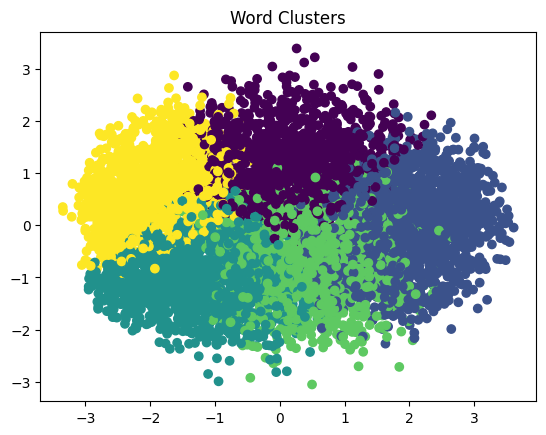

Cluster 0:
shepherd, grip, prey, pockets, leaf, marble, lemon, outer, mourning, winter, rear, section, sheet, crane, locations, deep, smiling, nose, rain, erected, sitting, decaying, tapping, majestic, tumbling, pile, forming, rocky, riders, silk, flesh, slices, garden, clad, bloom, fragments, depart, eyes, temperate, snakes, strapped, descending, nearby, hovering, canopy, flat, landscaped, heating, nautical, tail, square, hills, seafood, attic, housed, light, vacant, drink, soup, farm, monkey, perched, wind, consists, landed, drinking, pushes, envelope, exterior, dwelling, transported, fluid, seated, triple, horses, drift, spices, fat, weights, intersection, spotted, situated, walls, sugar, rests, cliffs, baton, studded, sit, crushed, splash, surround, babies, two-thirds, newborn, cap, dig, mountain, pot, palace, legs, swirling, hair, overturned, stocking, ranges, strategically, trees, dot, elevated, blues, washing, bear, occupying, pie, branches, tiny, mountainous, stretch, spinning,

In [21]:
baroque_csv_path = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/baroque_description.csv'
cluster_words(baroque_csv_path, 5, word_vectors)

In [27]:
baroque_data = pd.read_csv(baroque_csv_path, encoding='ISO-8859-1')


# Reusing the previously defined function to extract information and perform slot filling
def extract_info(description):
    # Check if the description is a string
    if not isinstance(description, str):
        return ("Unknown",) * 5  # Return 'Unknown' for all slots if description is not a string

    # Define patterns for each slot
    human_social_dynamics_pattern = r"(people|social|community|culture|society|human|individual|group|public|private|relations|interaction|community life|social structure|population|demographics|societal|humanity|social interaction)"
    artistic_cultural_expressions_pattern = r"(art|culture|cultural|heritage|tradition|traditional|modern|style|symbol|creativity|artwork|cultural practices|artistic creation|performances|music|dance|literature|crafts)"
    objects_materials_pattern = r"(object|material|item|artifact|tool|equipment|clothing|fabric|metal|wood|stone|glass|resource|textile|commodity|instrument|device|apparel|jewelry|ornament|utensil|furniture)"
    conceptual_philosophical_ideas_pattern = r"(idea|concept|philosophy|belief|thought|emotion|mind|spirit|ethic|value|ideology|worldview|perspective|theoretical|moral|ethical|intellectual|wisdom|insight|understanding|knowledge)"
    natural_environmental_elements_pattern = r"(nature|environment|landscape|natural|animal|plant|water|earth|sky|climate|flora|fauna|geography|terrain|ecosystem|biosphere|atmosphere|topography|habitat|wildlife|scenery)"

    # Extract information
    human_social_dynamics = ', '.join(set(re.findall(human_social_dynamics_pattern, description, re.IGNORECASE))) or "Unknown"
    artistic_cultural_expressions = ', '.join(set(re.findall(artistic_cultural_expressions_pattern, description, re.IGNORECASE))) or "Unknown"
    objects_materials = ', '.join(set(re.findall(objects_materials_pattern, description, re.IGNORECASE))) or "Unknown"
    conceptual_philosophical_ideas = ', '.join(set(re.findall(conceptual_philosophical_ideas_pattern, description, re.IGNORECASE))) or "Unknown"
    natural_environmental_elements = ', '.join(set(re.findall(natural_environmental_elements_pattern, description, re.IGNORECASE))) or "Unknown"

    return (human_social_dynamics, artistic_cultural_expressions, objects_materials, conceptual_philosophical_ideas, natural_environmental_elements)

# Applying the function to each description in the provided data
extracted_info = baroque_data['description'].apply(extract_info)

# Creating new columns for each slot in the dataframe
baroque_data['Human and Social Dynamics'] = extracted_info.str[0]
baroque_data['Artistic and Cultural Expressions'] = extracted_info.str[1]
baroque_data['Objects and Materials'] = extracted_info.str[2]
baroque_data['Conceptual and Philosophical Ideas'] = extracted_info.str[3]
baroque_data['Natural and Environmental Elements'] = extracted_info.str[4]

# Display the first few rows of the updated dataframe
baroque_data.head()

,NO,img,description,genre,Human and Social Dynamics,Artistic and Cultural Expressions,Objects and Materials,Conceptual and Philosophical Ideas,Natural and Environmental Elements
0,1,"Bella, Stefano della; Frontispiece for Il Merc...",\nThe image is a black and white engraving fro...,baroque,Unknown,"tradition, symbol",Unknown,"wisdom, idea","nature, plant"
1,2,"Elder, Jan Brueghel the; Paradise Landscape wi...",The image you've shown is a painting that is r...,baroque,"Human, group",Unknown,clothing,Unknown,"animal, sky, natural, environment, nature, lan..."
2,3,"Elder, Lucas Vorsterman the; Achilles and Pria...",The image you've shown appears to be a histori...,baroque,individual,"crafts, art",Unknown,Unknown,"nature, sky, atmosphere"
3,4,"Elder, Lucas Vorsterman the; Achilles and Pria...",The image depicts an etching or engraving full...,baroque,"individual, interaction, people, group","style, crafts, art",clothing,emotion,"sky, atmosphere"
4,5,"Goltzius, Hendrick; Christ before Pilate from ...",This is a black and white etching with signifi...,baroque,"society, interaction, social, group","style, art",clothing,emotion,"nature, atmosphere"


In [28]:
# Save the modified dataframe to a new CSV file
output_file_path = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/baroque_slot_filling.csv'
baroque_data.to_csv(output_file_path, index=False)

output_file_path

'/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/baroque_slot_filling.csv'

### 2. Impressionism slot filling (Complete)
- "Artistic Elements and Sensations"
- "Detailed Objects and Textures"
- "Outdoor Scenes and Activities"
- "Cultural and Expressive Interactions"
- "Societal Dynamics and Events"

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


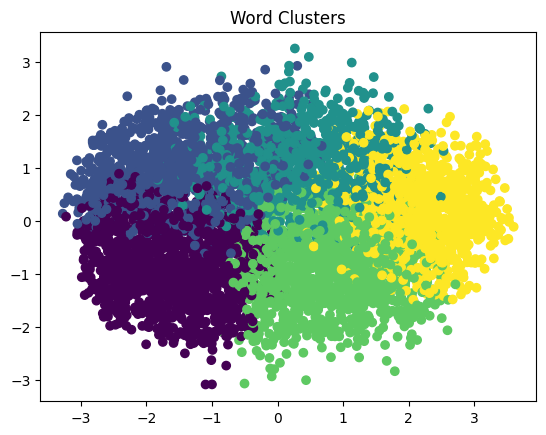

Cluster 0:
coursing, unassuming, smokestack, earthly, sensitivities, constancy, filtering, charm, disinterested, sketched, cluttered, illustrating, three-dimensional, immersion, realist, life-like, infuses, symbolize, misty, poignant, diffused, signifying, translucency, labyrinth, strikingly, imparting, cue, accentuated, haunting, working-class, unease, enchanting, self-assured, persevering, upper-middle-class, encapsulate, hushed, pensive, reclines, celestial, intermingled, herder, luminous, shout, pleasures, buoy, roughness, concealing, rowboats, distinguishable, curvature, mid-air, embodying, propping, punctuate, introspective, appreciates, snuggled, sways, timelessness, diagrams, demeanor, unclothed, statuses, haystacks, predominance, filtered, awe, brooding, bowing, outlasts, in., somberness, cheerful, strolling, uncluttered, intricacy, intimacy, hazier, churning, focussed, companionship, overarching, amplified, dimming, three-masted, sun., plein, dizzying, pleating, chatter, subd

In [ ]:
impressionism_csv_path = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/impressionism_description.csv'
cluster_words(impressionism_csv_path, 5, word_vectors)

In [ ]:
impressionism_data = pd.read_csv(impressionism_csv_path)


# Function to extract information for each slot from the impressionism description
def impressionism_extract_info(description):
    # Define patterns for each new slot
    artistic_elements_sensations_pattern = r"(color|light|shade|texture|sensation|emotion|feeling|atmosphere|visual|aesthetic|tonal|vibrant|palette|bright|soft|warm|cold)"
    detailed_objects_textures_pattern = r"(detail|object|texture|material|item|surface|structure|element|ornament|fabric|artifact|furniture|cloth|metal|wood|stone)"
    outdoor_scenes_activities_pattern = r"(outdoor|scene|landscape|nature|activity|environment|setting|field|garden|beach|urban|rural|vista|park|forest|mountain|river|sea)"
    cultural_expressive_interactions_pattern = r"(cultural|expressive|interaction|tradition|heritage|custom|expression|symbol|ritual|festival|ceremony|celebration|dance|music|art)"
    societal_dynamics_events_pattern = r"(society|dynamic|event|movement|social|public|communal|national|protest|parade|assembly|gathering|market|festival|celebration|crowd|group)"

    # Extract information
    artistic_elements_sensations = ', '.join(set(re.findall(artistic_elements_sensations_pattern, description, re.IGNORECASE)))
    detailed_objects_textures = ', '.join(set(re.findall(detailed_objects_textures_pattern, description, re.IGNORECASE)))
    outdoor_scenes_activities = ', '.join(set(re.findall(outdoor_scenes_activities_pattern, description, re.IGNORECASE)))
    cultural_expressive_interactions = ', '.join(set(re.findall(cultural_expressive_interactions_pattern, description, re.IGNORECASE)))
    societal_dynamics_events = ', '.join(set(re.findall(societal_dynamics_events_pattern, description, re.IGNORECASE)))

    # Fill in "Unknown" if a slot is not found
    return (
        artistic_elements_sensations if artistic_elements_sensations else "Unknown",
        detailed_objects_textures if detailed_objects_textures else "Unknown",
        outdoor_scenes_activities if outdoor_scenes_activities else "Unknown",
        cultural_expressive_interactions if cultural_expressive_interactions else "Unknown",
        societal_dynamics_events if societal_dynamics_events else "Unknown"
    )

# Apply the function to each description and add the results to new columns
impressionism_data[['Artistic Elements and Sensations', 'Detailed Objects and Textures',
                    'Outdoor Scenes and Activities', 'Cultural and Expressive Interactions',
                    'Societal Dynamics and Events']] = impressionism_data['description'].apply(lambda x: pd.Series(impressionism_extract_info(x)))

# Displaying the first few rows of the modified dataset
impressionism_data.head()

,NO,img,description,genre,Artistic Elements and Sensations,Detailed Objects and Textures,Outdoor Scenes and Activities,Cultural and Expressive Interactions,Societal Dynamics and Events
0,1,After Bathing - Joaqu챠n Sorolla y Bastida.jpg,I'm looking at a painting filled with vibrant ...,impressionism,"light, emotion, warm, vibrant, color",fabric,"scene, beach, nature","interaction, art","dynamic, movement"
1,2,"After Bathing, Valencia - Joaqu챠n Sorolla y Ba...","This image appears to be a painted artwork, po...",impressionism,"bright, shade, light, feeling, warm, color",detail,"outdoor, environment, setting, activity, scene","expression, art",movement
2,3,"Ancher, Anna; A Funeral; 1891.jpg",This is an oil painting depicting a somber sce...,impressionism,"palette, atmosphere, light, emotion, color","wood, cloth",scene,"tradition, expression, symbol, art","group, event"
3,4,"Ancher, Anna; Interior with clematis; 1913.jpg",This image depicts a peaceful interior scene w...,impressionism,"light, feeling, soft, warm, vibrant, color",cloth,"sea, setting, scene",art,Unknown
4,5,Appraising the Day_u0027s Work - Anna Ancher a...,"This image depicts a scene set in an intimate,...",impressionism,"atmosphere, light, feeling, soft, warm, textur...","item, surface, element, fabric, wood, texture,...","environment, sea, scene",art,Unknown


In [ ]:
# Save the modified dataframe to a new CSV file
output_file_path = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/impressionism_slot_filling.csv'
impressionism_data.to_csv(output_file_path, index=False)

output_file_path

'/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/impressionism_slot_filling.csv'

### 3. Realism slot filling (Complete)
- "Natural and Rural Scenes"
- "Social and Cultural Dynamics"
- "Artistic Elements and Objects"
- "Conceptual and Emotional Expressions"
- "Historical and Traditional Imagery"

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


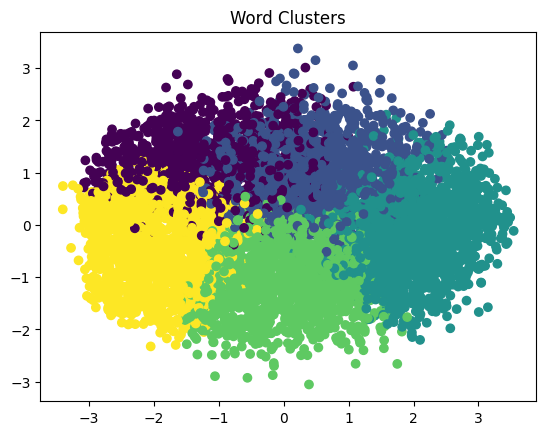

Cluster 0:
smoky, tangle, symbolizing, spray, sagging, spade, layer, textured, reclining, textiles, paired, octagonal, grayish, puffy, texture, birch, apples, panels, thickness, knots, yellow, sheet, planks, pocket, silhouettes, striped, outstretched, rounded, evenly, furry, bedding, wares, smile, knee-length, curving, binoculars, broom, graced, protective, straw, trunk, vase, tapestry, pumpkin, handkerchief, fingernails, puff, curtains, softer, marble, mist, stylized, furnished, crouching, blue-grey, initials, feather, taller, mustache, mask, filters, hugging, tones, sheets, trunks, cylindrical, puppet, armor, brush, lily, wallpaper, sliced, glowing, flowers, gray, scrolls, clothing, finger, sack, headband, rosary, creamy, straps, insert, bow, needles, egg, tossed, elbows, bushes, boxers, color, pink, perched, flanks, strands, fitting, nuts, groomed, markings, mane, reeds, fitted, trousers, plaid, neckline, gloved, jacket, dusted, oversized, vest, thread, bayonets, wrapped, ribbon, se

In [ ]:
realism_csv_path = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/realism_description.csv'
cluster_words(realism_csv_path, 5, word_vectors)

In [ ]:
import re

realism_data = pd.read_csv(realism_csv_path)

# Updated function for slot filling with broader patterns

def realism_extract_info_updated(description):
    # Check if the description is a string
    if not isinstance(description, str):
        return ("Unknown",) * 5

    # Updated broader patterns
    natural_rural_scenes_pattern = r"(landscape|nature|forest|river|sky|natural|historical|mountain|sea|urban|outdoor|countryside|scenic)"
    social_cultural_dynamics_pattern = r"(portrait|figure|human|life|event|scene|daily|society|community|individual|people|character|social)"
    artistic_elements_objects_pattern = r"(artistic|cultural|expression|style|technique|genre|tradition|symbolism|ritual|craft|design)"
    conceptual_emotional_expressions_pattern = r"(emotion|philosophy|idea|belief|thought|feeling|concept|spiritual|existential|mental|mind)"
    historical_traditional_imagery_pattern = r"(historical|traditional|ancient|heritage|classic|vintage|old|era|period|past|antique)"

    # Extract information with broader patterns
    natural_rural_scenes = ', '.join(set(re.findall(natural_rural_scenes_pattern, description, re.IGNORECASE)))
    social_cultural_dynamics = ', '.join(set(re.findall(social_cultural_dynamics_pattern, description, re.IGNORECASE)))
    artistic_elements_objects = ', '.join(set(re.findall(artistic_elements_objects_pattern, description, re.IGNORECASE)))
    conceptual_emotional_expressions = ', '.join(set(re.findall(conceptual_emotional_expressions_pattern, description, re.IGNORECASE)))
    historical_traditional_imagery = ', '.join(set(re.findall(historical_traditional_imagery_pattern, description, re.IGNORECASE)))

    # Return 'Unknown' if no match found
    return (
        natural_rural_scenes if natural_rural_scenes else "Unknown",
        social_cultural_dynamics if social_cultural_dynamics else "Unknown",
        artistic_elements_objects if artistic_elements_objects else "Unknown",
        conceptual_emotional_expressions if conceptual_emotional_expressions else "Unknown",
        historical_traditional_imagery if historical_traditional_imagery else "Unknown"
    )

# Apply the updated function to each description in the dataframe
realism_data['Natural and Rural Scenes'] = realism_data['description'].apply(lambda x: realism_extract_info_updated(x)[0])
realism_data['Social and Cultural Dynamics'] = realism_data['description'].apply(lambda x: realism_extract_info_updated(x)[1])
realism_data['Artistic Elements and Objects'] = realism_data['description'].apply(lambda x: realism_extract_info_updated(x)[2])
realism_data['Conceptual and Emotional Expressions'] = realism_data['description'].apply(lambda x: realism_extract_info_updated(x)[3])
realism_data['Historical and Traditional Imagery'] = realism_data['description'].apply(lambda x: realism_extract_info_updated(x)[4])

realism_data.head()


,NO,img,description,genre,Natural and Rural Scenes,Social and Cultural Dynamics,Artistic Elements and Objects,Conceptual and Emotional Expressions,Historical and Traditional Imagery
0,1,A Man Reading in a Garden (recto); Preliminary...,The image depicts an artwork showcasing a tran...,realism,"outdoor, nature, natural","life, scene",Unknown,feeling,old
1,2,A Man Reading in a Garden (recto); Preliminary...,This is an image of a person sitting peacefull...,realism,"sea, forest, nature, natural","scene, figure, individual","style, technique","thought, feeling","era, past, old, classic"
2,3,A Norman Milkmaid at Gr챕ville.jpg,This is an image of a painting depicting a sol...,realism,"sky, nature, landscape","scene, figure",expression,"thought, emotion, feeling",era
3,4,A Seated Shepherd with His Dog and Sheep - Jea...,This is a monochrome drawing that captures a s...,realism,"outdoor, sky, landscape, natural, sea","life, scene, event, figure",Unknown,"emotion, feeling","era, classic"
4,5,A Shepherdess with Her Flock - Jean-Fran챌ois M...,This image portrays a pastoral scene sketched ...,realism,"forest, sky, nature, landscape","life, scene, figure",tradition,"idea, feeling","traditional, era, old, past"


In [ ]:
updated_file_path = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/realism_slot_filling.csv'
realism_data.to_csv(updated_file_path, index=False)

updated_file_path

'/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/realism_slot_filling.csv'

### 4. Romanticism slot filling (Complete)
- "Natural and Rustic Realms"
- "Social and Political Dynamics"
- "Emotional and Artistic Expressions"
- "Cultural and Historical Artifacts"
- "Detailed and Textured Objects"

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


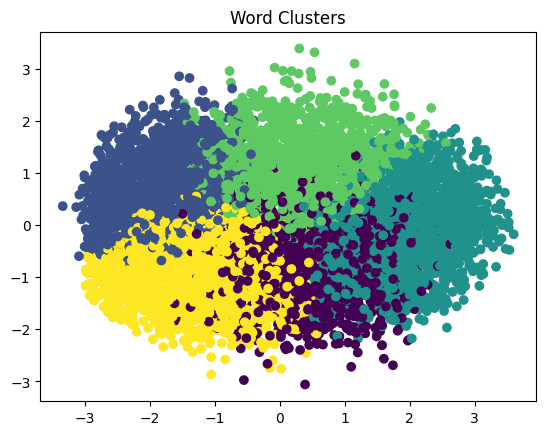

Cluster 0:
imaginative, object, filtering, emphasizing, forgotten, definitive, illustrating, three-dimensional, provides, focuses, random, referenced, portrait, ranging, ancient, scientific, acceptance, trick, healing, identifies, texture, wider, anonymous, stunning, written, specified, celestial, quality, lessons, necessarily, expose, accurately, moody, historical, guidance, judging, pictorial, understood, background, divine, exploring, achievements, classic, guiding, myth, publisher, proximity, coupled, vibrant, retains, arts, exaggerated, ambiguous, directions, entirely, narratives, styles, seemingly, experiencing, spanning, sacred, elaborate, separation, size, aspect, perception, tones, motion, suggest, engaging, extreme, traveler, puppet, varied, wording, mythological, merging, refined, enduring, intimate, endless, relate, testament, text, document, painter, manner, transformation, prominently, mentioning, portrayed, profession, &, poet, color, odd, prevalent, similarity, overly, 

In [ ]:
romanticism_csv_path = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/romanticism_description.csv'
cluster_words(romanticism_csv_path, 5, word_vectors)

In [ ]:
# Load the provided CSV file
romanticism_data = pd.read_csv(romanticism_csv_path, encoding='ISO-8859-1')

# Updated patterns for each slot based on the cluster themes
natural_rustic_realms_pattern_expanded = r"(natural|rustic|realm|nature|landscape|wildlife|flora|fauna|environment|outdoors|countryside|forest|mountain|river|sea|beach|valley|scenery|wilderness|garden|prairie|terrain|ecosystem|waterfall|lake|ocean|field|grove|climate|weather)"
social_political_dynamics_pattern_expanded = r"(social|political|dynamics|community|society|cultural|interaction|institution|organizational|historical|tradition|ritual|festival|ceremony|custom|heritage|politics|government|law|democracy|revolution|war|peace|social norms|social change|public life|civic engagement|sociopolitical)"
emotional_artistic_expressions_pattern_expanded = r"(emotional|artistic|expressions|feelings|emotions|imagination|creativity|aesthetic|symbolic|melancholy|joy|sadness|passion|love|fear|hope|desire|dream|mood|sentiment|atmosphere|inspiration|expression|creativity|artistry|muse|poetry|drama|music|color|form)"
cultural_historical_artifacts_pattern_expanded = r"(cultural|historical|artifacts|heritage|tradition|ancient|archaeological|mythical|legendary|antique|relic|monument|ruin|artifact|symbol|myth|legend|folklore|historical events|cultural identity|folk traditions|spiritual beliefs|mythological themes|historical narratives|cultural symbols|heritage sites)"
detailed_textured_objects_pattern_expanded = r"(detailed|textured|objects|specific|intricate|complex|elaborate|refined|decorative|ornate|crafted|design|pattern|texture|detail|carving|embroidery|material|fabric|woodwork|metalwork|stonework|finery|garment|accessory|ornamentation|craftsmanship|handiwork|furnishing)"

# Reapplying the updated function for slot filling
def romanticism_extract_info_updated(description):
    # Extract information for each updated pattern
    natural_rustic_realms = ', '.join(set(re.findall(natural_rustic_realms_pattern, description, re.IGNORECASE)))
    social_political_dynamics = ', '.join(set(re.findall(social_political_dynamics_pattern, description, re.IGNORECASE)))
    emotional_artistic_expressions = ', '.join(set(re.findall(emotional_artistic_expressions_pattern, description, re.IGNORECASE)))
    cultural_historical_artifacts = ', '.join(set(re.findall(cultural_historical_artifacts_pattern, description, re.IGNORECASE)))
    detailed_textured_objects = ', '.join(set(re.findall(detailed_textured_objects_pattern, description, re.IGNORECASE)))

    # Return 'Unknown' if no match found
    return (
        natural_rustic_realms if natural_rustic_realms else "Unknown",
        social_political_dynamics if social_political_dynamics else "Unknown",
        emotional_artistic_expressions if emotional_artistic_expressions else "Unknown",
        cultural_historical_artifacts if cultural_historical_artifacts else "Unknown",
        detailed_textured_objects if detailed_textured_objects else "Unknown"
    )

# Apply the updated function to each description in the dataframe
romanticism_data['Slot Filling'] = romanticism_data['description'].apply(romanticism_extract_info_updated)

# Create new columns for each slot in the dataframe
romanticism_data[['Natural and Rustic Realms', 'Social and Political Dynamics', 'Emotional and Artistic Expressions', 'Cultural and Historical Artifacts', 'Detailed and Textured Objects']] = pd.DataFrame(romanticism_data['Slot Filling'].tolist(), index=romanticism_data.index)

# Drop the 'Slot Filling' column as it is no longer needed
romanticism_data.drop(columns=['Slot Filling'], inplace=True)

# Display the first few rows of the updated dataframe
romanticism_data.head()

,ï»¿NO,img,description,genre,Natural and Rustic Realms,Social and Political Dynamics,Emotional and Artistic Expressions,Cultural and Historical Artifacts,Detailed and Textured Objects
0,1,A caza de dientes (Out Hunting for Teeth).jpg,This is an etching that depicts a dramatic and...,romanticism,"nature, natural","social, tradition","expressions, emotional, fear",tradition,"detail, pattern, specific"
1,2,A Mill - David Lucas_John Constable.jpg,You are looking at an image that invokes a sen...,romanticism,"river, nature, flora, landscape, forest",tradition,"feelings, emotional","tradition, ruin",detailed
2,3,A Saddled Bay Hunter - George Stubbs.jpg,"This is an image of a painting, depicting a so...",romanticism,"sea, landscape, natural",Unknown,joy,Unknown,Unknown
3,4,A veranda overgrown with grape vines - Silvest...,This is a captivating painting depicting a rus...,romanticism,"rustic, sea, nature","interaction, tradition",joy,"tradition, ruin",Unknown
4,5,"Aivazovsky, Ivan; Seacape with Full Moon; 1857...",The image presents a tranquil nocturnal seasca...,romanticism,"sea, nature",Unknown,feelings,Unknown,"texture, textured"


In [ ]:
# Save the modified dataframe to a new CSV file
output_file_path = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/romanticism_slot_filling.csv'
romanticism_data.to_csv(output_file_path, index=False)

output_file_path


'/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/romanticism_slot_filling.csv'

### 5. Street Art (Complete)
- "Urban and Material Culture"
- "Artistic and Abstract Expressions "
- "Social and Historical Narratives"
- "Emotional and Symbolic Imagery"
- "Technical and Environmental Aspects"








/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


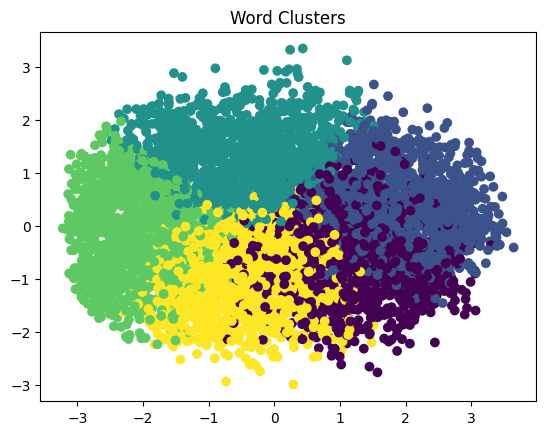

Cluster 0:
object, serves, filtering, extending, definitive, solidarity, effects, repeated, provides, focuses, random, clearly, commercial, observers, breakdown, ranging, conservation, ancient, scientific, involved, accumulated, irregularities, alarm, maintaining, branded, inner, ideas, wider, tactical, corruption, technological, long-term, construction, transit, quality, disruption, influence, cultures, drug, sparking, enable, historical, society, conditioning, guidance, signals, basic, scheduling, operating, grounds, ownership, background, burden, electrical, relatively, transport, oversee, code, isolation, frequent, engagement, allow, proximity, coupled, further, seeks, participating, arts, rail, turmoil, entirely, power, observe, output, illegal, massive, continuing, spanning, transportation, transitional, separation, size, motion, imposing, suggest, access, trigger, identify, vast, preserving, promising, varied, dominate, merging, overcome, differently, concentrated, groups, align

In [ ]:
street_art_csv_path = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/street art_description.csv'
cluster_words(street_art_csv_path, 5, word_vectors)

In [ ]:
street_art_data = pd.read_csv(street_art_csv_path, encoding='ISO-8859-1')
# 슬롯 필링 함수를 보다 포괄적으로 수정

# Updated patterns with expanded keywords for the Street Art dataset
urban_material_culture_pattern_expanded = r"(urban|city|construction|building|architecture|infrastructure|street|concrete|metropolitan|town|metropolis|skyscraper|public space|urban landscape|cityscape|road|alley|graffiti|mural|public art|street life)"
artistic_abstract_expressions_pattern_expanded = r"(artistic|abstract|expression|creativity|imagination|conceptual|design|style|aesthetic|colorful|vivid|unique|creative|graffiti|mural|visual art|graphic|illustration|pattern|figurative|non-figurative|abstract art|street art|urban art)"
social_historical_narratives_pattern_expanded = r"(social|historical|narrative|society|community|tradition|heritage|history|events|political|activism|social commentary|political statement|historical context|cultural commentary|activist art|public message|social critique|urban history|community stories)"
emotional_symbolic_imagery_pattern_expanded = r"(emotional|symbolic|imagery|feeling|emotion|symbol|metaphor|representation|message|heartfelt|expressive|metaphorical|allegorical|inspirational|provocative|evocative|sentimental|narrative|iconic|symbolism|visual metaphor)"
technical_environmental_aspects_pattern_expanded = r"(technical|environmental|technology|ecology|nature|science|mechanical|engineering|innovative|sustainable|green|spray paint|stencil art|wall art|eco-friendly|recycled materials|sustainability|green art|street installation|public installation|artistic technique)"

# Updated function for the Street Art dataset
def street_art_extract_info_v2_expanded(description):
    urban_material_culture = ', '.join(set(re.findall(urban_material_culture_pattern_expanded, description, re.IGNORECASE))) or "Unknown"
    artistic_abstract_expressions = ', '.join(set(re.findall(artistic_abstract_expressions_pattern_expanded, description, re.IGNORECASE))) or "Unknown"
    social_historical_narratives = ', '.join(set(re.findall(social_historical_narratives_pattern_expanded, description, re.IGNORECASE))) or "Unknown"
    emotional_symbolic_imagery = ', '.join(set(re.findall(emotional_symbolic_imagery_pattern_expanded, description, re.IGNORECASE))) or "Unknown"
    technical_environmental_aspects = ', '.join(set(re.findall(technical_environmental_aspects_pattern_expanded, description, re.IGNORECASE))) or "Unknown"

    return (
        urban_material_culture,
        artistic_abstract_expressions,
        social_historical_narratives,
        emotional_symbolic_imagery,
        technical_environmental_aspects
    )

# Apply the updated function to each description in the dataframe
street_art_data['Urban and Material Culture'] = street_art_data['description'].apply(lambda x: street_art_extract_info_v2_expanded(x)[0])
street_art_data['Artistic and Abstract Expressions'] = street_art_data['description'].apply(lambda x: street_art_extract_info_v2_expanded(x)[1])
street_art_data['Social and Historical Narratives'] = street_art_data['description'].apply(lambda x: street_art_extract_info_v2_expanded(x)[2])
street_art_data['Emotional and Symbolic Imagery'] = street_art_data['description'].apply(lambda x: street_art_extract_info_v2_expanded(x)[3])
street_art_data['Technical and Environmental Aspects'] = street_art_data['description'].apply(lambda x: street_art_extract_info_v2_expanded(x)[4])

# Display the first few rows of the updated dataframe
street_art_data.head()



,ï»¿NO,img,description,genre,Urban and Material Culture,Artistic and Abstract Expressions,Social and Historical Narratives,Emotional and Symbolic Imagery,Technical and Environmental Aspects
0,1,(HR) Okuda u0026 Remed. Streets of Colour. MIA...,"This is an image of a large, colorful mural pa...",street art,"Street, mural, public space, building, street,...","abstract, style, pattern, creativity, mural, c...",Unknown,"imagery, symbol, feeling",nature
1,2,"1 wall of u0027Recycles_u0027 - Proembrion, Ce...",This image depicts a large mural painted on th...,street art,"urban, building, mural, street","imagination, style, abstract, mural",narrative,"narrative, emotion, feeling",technology
2,3,10.14.13 - Jerms and Topaz Graffiti.jpg,This image features a mural filled with vibran...,street art,"street, urban, mural, graffiti","design, abstract, style, mural, expression, st...",community,"message, feeling, expressive",green
3,4,11.08.13 - Various graffiti artists and murali...,The image captures a vibrant urban landscape d...,street art,"city, building, street, urban, public art, gra...","style, creativity, colorful, vivid, expression...",Unknown,"message, feeling",Unknown
4,5,11.29.11jpg - Shiro.jpg,The image shows a vibrant and colorful piece o...,street art,"mural, building, street, urban, graffiti","visual art, creativity, mural, colorful, expre...",Unknown,"feeling, expressive",green


In [ ]:
# Save the modified dataframe to a new CSV file
output_file_path = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/street_art_slot_filling.csv'
street_art_data.to_csv(output_file_path, index=False)

output_file_path


'/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/street_art_slot_filling.csv'

## 2. IOB-Tagging

In [31]:
import pandas as pd

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:

# Then, we will proceed with the IOB tagging based on the provided description and code.
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Adjusting the IOB tagging function to handle multiple items in a cell as separate entities for tagging
def iob_tagging_description_df(data):
    # Apply BIO tagging to the description column and return results as a DataFrame
    tagging_results = []
    o_tagged_tokens = []

    for _, row in data.iterrows():
        description_tokens = tokenize(row['description'])
        tagged_tokens = []

        for token in description_tokens:
            matched = False

            # Check if the token matches any of the slots in specified columns
            for col in data.columns[4:9]:  # Assuming the slot columns are from 1 to 6
                if pd.isna(row[col]):
                    continue  # Skip if the slot is NaN

                column_values = str(row[col]).lower().split(', ')
                for column_value in column_values:
                    if token in tokenize(column_value):
                        if col in tagged_tokens:
                            tagged_tokens.append((token, 'I-' + col))
                        else:
                            tagged_tokens.append((token, 'B-' + col))
                            tagged_tokens.append(col)
                        matched = True
                        break
                if matched:
                    break

            if not matched:
                tagged_tokens.append((token, 'O'))
                o_tagged_tokens.append(token)

        # Remove temporary tracking tokens for the column
        tagged_tokens = [t for t in tagged_tokens if not isinstance(t, str)]
        tagging_results.append(tagged_tokens)

    # Convert to DataFrame
    result_df = pd.DataFrame({'description': data['description'], 'IOB_tag': tagging_results})
    return result_df, set(o_tagged_tokens)   # Return tagged tokens as a set

def process_and_concatenate_data(input_csv_path, output_csv_path):
    # Load the data from the input CSV
    data = pd.read_csv(input_csv_path, encoding='ISO-8859-1')

    # Apply the tagging function
    tagged_description_df, unique_o_tagged_tokens = iob_tagging_description_df(data)

    # Create the 'word_labels' column
    tagged_description_df['word_labels'] = [['O' if tag == 'O' else f'{tag.split("-")[0]}-{tag.split("-")[1]}' for _, tag in row] for row in tagged_description_df['IOB_tag']]

    # Concatenate the two DataFrames
    concatenated_data = pd.concat([data, tagged_description_df[['IOB_tag', 'word_labels']]], axis=1)

    # Save the concatenated data to the output CSV
    concatenated_data.to_csv(output_csv_path, index=False)


### 1. Baroque

In [90]:
import pandas as pd
import re
from typing import List, Tuple, Dict

def process_csv_for_iob_tagging(file_path: str) -> pd.DataFrame:
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Helper function to tokenize the description
    def tokenize_description(description: str) -> List[str]:
        return re.findall(r'\b\w+\b', description.lower())

    # Function to perform IOB tagging
    def iob_tagging(description: str, slots: Dict[str, List[str]]) -> List[Tuple[str, str]]:
        tokens = tokenize_description(description)
        tags = ['O'] * len(tokens)

        for slot, entities in slots.items():
            for entity in entities:
                entity_tokens = entity.split()
                entity_len = len(entity_tokens)

                for i in range(len(tokens) - entity_len + 1):
                    if tokens[i:i+entity_len] == entity_tokens:
                        tags[i] = 'B-' + slot
                        for j in range(1, entity_len):
                            tags[i+j] = 'I-' + slot

        return list(zip(tokens, tags))

    # Extracting slot information
    slots = {
        "Human_and_Social_Dynamics": df['Human and Social Dynamics'].str.lower().str.split(", ").sum(),
        "Artistic_and_Cultural_Expressions": df['Artistic and Cultural Expressions'].str.lower().str.split(", ").sum(),
        "Objects_and_Materials": df['Objects and Materials'].str.lower().str.split(", ").sum(),
        "Conceptual_and_Philosophical_Ideas": df['Conceptual and Philosophical Ideas'].str.lower().str.split(", ").sum(),
        "Natural_and_Environmental_Elements": df['Natural and Environmental Elements'].str.lower().str.split(", ").sum()
    }

    # Removing 'unknown' from slots
    for key in slots:
        slots[key] = [entity for entity in slots[key] if entity != 'unknown']

    # Function to create columns with tuples for IOB tags and word_labels
    def create_tuple_columns(df: pd.DataFrame, slots: Dict[str, List[str]]) -> pd.DataFrame:
        iob_tags_tuples = []
        word_labels_tuples = []

        for _, row in df.iterrows():
            tagged_tokens = iob_tagging(row['description'], slots)
            iob_tags_tuples.append(tagged_tokens)
            word_labels_tuples.append([tag for _, tag in tagged_tokens])

        df['iob_tag_tuples'] = iob_tags_tuples
        df['word_labels_tuples'] = word_labels_tuples

        return df

    # Apply the function to the dataframe
    return create_tuple_columns(df, slots)

# Example usage
file_path = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/baroque_slot_filling.csv'
processed_df = process_csv_for_iob_tagging(file_path)

In [91]:
# Specify the output file path where you want to save the DataFrame
output_file_path = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/baroque_SF_IOB.csv'

# Use the to_csv method to save the DataFrame to a CSV file
processed_df.to_csv(output_file_path, index=False)

# Confirm that the data has been saved successfully
print(f'Data saved to {output_file_path}')

Data saved to /content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/baroque_SF_IOB.csv


### 2. Impressionism

In [92]:
# Using the same function 'process_csv_for_iob_tagging' for the impressionism_slot_filling.csv file

def process_csv_for_iob_tagging_impressionism(file_path: str) -> pd.DataFrame:
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Helper function to tokenize the description
    def tokenize_description(description: str) -> List[str]:
        return re.findall(r'\b\w+\b', description.lower())

    # Function to perform IOB tagging
    def iob_tagging(description: str, slots: Dict[str, List[str]]) -> List[Tuple[str, str]]:
        tokens = tokenize_description(description)
        tags = ['O'] * len(tokens)

        for slot, entities in slots.items():
            for entity in entities:
                entity_tokens = entity.split()
                entity_len = len(entity_tokens)

                for i in range(len(tokens) - entity_len + 1):
                    if tokens[i:i+entity_len] == entity_tokens:
                        tags[i] = 'B-' + slot
                        for j in range(1, entity_len):
                            tags[i+j] = 'I-' + slot

        return list(zip(tokens, tags))

    # Extracting slot information
    slots = {
        "Artistic_Elements_and_Sensations": df['Artistic Elements and Sensations'].str.lower().str.split(", ").sum(),
        "Detailed_Objects_and_Textures": df['Detailed Objects and Textures'].str.lower().str.split(", ").sum(),
        "Outdoor_Scenes_and_Activities": df['Outdoor Scenes and Activities'].str.lower().str.split(", ").sum(),
        "Cultural_and_Expressive_Interactions": df['Cultural and Expressive Interactions'].str.lower().str.split(", ").sum(),
        "Societal_Dynamics_and_Events": df['Societal Dynamics and Events'].str.lower().str.split(", ").sum()
    }

    # Removing 'unknown' from slots
    for key in slots:
        slots[key] = [entity for entity in slots[key] if entity != 'unknown']

    # Function to create columns with tuples for IOB tags and word_labels
    def create_tuple_columns(df: pd.DataFrame, slots: Dict[str, List[str]]) -> pd.DataFrame:
        iob_tags_tuples = []
        word_labels_tuples = []

        for _, row in df.iterrows():
            tagged_tokens = iob_tagging(row['description'], slots)
            iob_tags_tuples.append(tagged_tokens)
            word_labels_tuples.append([tag for _, tag in tagged_tokens])

        df['iob_tag_tuples'] = iob_tags_tuples
        df['word_labels_tuples'] = word_labels_tuples

        return df

    # Apply the function to the dataframe
    return create_tuple_columns(df, slots)

# Apply the IOB tagging function to the impressionism_slot_filling.csv file
file_path_impressionism = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/impressionism_slot_filling.csv'
processed_df_impressionism = process_csv_for_iob_tagging_impressionism(file_path_impressionism)


In [93]:
# Specify the output file path where you want to save the DataFrame
output_file_path_impressionism = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/impressionism_SF_IOB.csv'

# Use the to_csv method to save the DataFrame to a CSV file
processed_df_impressionism.to_csv(output_file_path_impressionism, index=False)

# Confirm that the data has been saved successfully
print(f'Data saved to {output_file_path_impressionism}')


Data saved to /content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/impressionism_SF_IOB.csv


### 3. Realism

In [96]:
import re
from typing import List, Tuple, Dict

def process_csv_for_iob_tagging_realism(file_path: str) -> pd.DataFrame:
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Helper function to tokenize the description
    def tokenize_description(description: str) -> List[str]:
        return re.findall(r'\b\w+\b', description.lower())

    # Function to perform IOB tagging
    def iob_tagging(description: str, slots: Dict[str, List[str]]) -> List[Tuple[str, str]]:
        tokens = tokenize_description(description)
        tags = ['O'] * len(tokens)

        for slot, entities in slots.items():
            for entity in entities:
                entity_tokens = entity.split()
                entity_len = len(entity_tokens)

                for i in range(len(tokens) - entity_len + 1):
                    if tokens[i:i+entity_len] == entity_tokens:
                        tags[i] = 'B-' + slot
                        for j in range(1, entity_len):
                            tags[i+j] = 'I-' + slot

        return list(zip(tokens, tags))

    # Extracting slot information
    slots = {
        "Natural_and_Rural_Scenes": df['Natural and Rural Scenes'].str.lower().str.split(", ").sum(),
        "Social_and_Cultural_Dynamics": df['Social and Cultural Dynamics'].str.lower().str.split(", ").sum(),
        "Artistic_Elements_and_Objects": df['Artistic Elements and Objects'].str.lower().str.split(", ").sum(),
        "Conceptual_and_Emotional_Expressions": df['Conceptual and Emotional Expressions'].str.lower().str.split(", ").sum(),
        "Historical_and_Traditional_Imagery": df['Historical and Traditional Imagery'].str.lower().str.split(", ").sum()
    }

    # Removing 'unknown' from slots
    for key in slots:
        slots[key] = [entity for entity in slots[key] if entity != 'unknown']

    # Function to create columns with tuples for IOB tags and word_labels
    def create_tuple_columns(df: pd.DataFrame, slots: Dict[str, List[str]]) -> pd.DataFrame:
        iob_tags_tuples = []
        word_labels_tuples = []

        for _, row in df.iterrows():
            tagged_tokens = iob_tagging(row['description'], slots)
            iob_tags_tuples.append(tagged_tokens)
            word_labels_tuples.append([tag for _, tag in tagged_tokens])

        df['iob_tag_tuples'] = iob_tags_tuples
        df['word_labels_tuples'] = word_labels_tuples

        return df

    # Apply the function to the dataframe
    return create_tuple_columns(df, slots)

# Process the realism_slot_filling.csv file
realism_file_path = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/realism_slot_filling.csv'
processed_realism_df = process_csv_for_iob_tagging_realism(realism_file_path)
processed_realism_df.head()


,NO,img,description,genre,Natural and Rural Scenes,Social and Cultural Dynamics,Artistic Elements and Objects,Conceptual and Emotional Expressions,Historical and Traditional Imagery,iob_tag_tuples,word_labels_tuples
0,1,A Man Reading in a Garden (recto); Preliminary...,The image depicts an artwork showcasing a tran...,realism,"outdoor, nature, natural","life, scene",Unknown,feeling,old,"[(the, O), (image, O), (depicts, O), (an, O), ...","[O, O, O, O, O, O, O, O, B-Natural_and_Rural_S..."
1,2,A Man Reading in a Garden (recto); Preliminary...,This is an image of a person sitting peacefull...,realism,"sea, forest, nature, natural","scene, figure, individual","style, technique","thought, feeling","era, past, old, classic","[(this, O), (is, O), (an, O), (image, O), (of,...","[O, O, O, O, O, O, O, O, O, O, B-Natural_and_R..."
2,3,A Norman Milkmaid at Gr챕ville.jpg,This is an image of a painting depicting a sol...,realism,"sky, nature, landscape","scene, figure",expression,"thought, emotion, feeling",era,"[(this, O), (is, O), (an, O), (image, O), (of,...","[O, O, O, O, O, O, O, O, O, O, O, B-Social_and..."
3,4,A Seated Shepherd with His Dog and Sheep - Jea...,This is a monochrome drawing that captures a s...,realism,"outdoor, sky, landscape, natural, sea","life, scene, event, figure",Unknown,"emotion, feeling","era, classic","[(this, O), (is, O), (a, O), (monochrome, O), ...","[O, O, O, O, O, O, O, O, B-Social_and_Cultural..."
4,5,A Shepherdess with Her Flock - Jean-Fran챌ois M...,This image portrays a pastoral scene sketched ...,realism,"forest, sky, nature, landscape","life, scene, figure",tradition,"idea, feeling","traditional, era, old, past","[(this, O), (image, O), (portrays, O), (a, O),...","[O, O, O, O, O, B-Social_and_Cultural_Dynamics..."


In [97]:
# Specify the output file path where you want to save the DataFrame
output_file_path_realism = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/realism_SF_IOB.csv'

# Use the to_csv method to save the DataFrame to a CSV file
processed_realism_df.to_csv(output_file_path_realism, index=False)

# Confirm that the data has been saved successfully
print(f'Data saved to {output_file_path_realism}')


Data saved to /content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/realism_SF_IOB.csv


### 4. Romanticism

In [95]:
def process_csv_for_iob_tagging_romanticism(file_path: str) -> pd.DataFrame:
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Helper function to tokenize the description
    def tokenize_description(description: str) -> List[str]:
        return re.findall(r'\b\w+\b', description.lower())

    # Function to perform IOB tagging
    def iob_tagging(description: str, slots: Dict[str, List[str]]) -> List[Tuple[str, str]]:
        tokens = tokenize_description(description)
        tags = ['O'] * len(tokens)

        for slot, entities in slots.items():
            for entity in entities:
                entity_tokens = entity.split()
                entity_len = len(entity_tokens)

                for i in range(len(tokens) - entity_len + 1):
                    if tokens[i:i+entity_len] == entity_tokens:
                        tags[i] = 'B-' + slot
                        for j in range(1, entity_len):
                            tags[i+j] = 'I-' + slot

        return list(zip(tokens, tags))

    # Extracting slot information
    slots = {
        "Natural_and_Rustic_Realms": df['Natural and Rustic Realms'].str.lower().str.split(", ").sum(),
        "Social_and_Political_Dynamics": df['Social and Political Dynamics'].str.lower().str.split(", ").sum(),
        "Emotional_and_Artistic_Expressions": df['Emotional and Artistic Expressions'].str.lower().str.split(", ").sum(),
        "Cultural_and_Historical_Artifacts": df['Cultural and Historical Artifacts'].str.lower().str.split(", ").sum(),
        "Detailed_and_Textured_Objects": df['Detailed and Textured Objects'].str.lower().str.split(", ").sum()
    }

    # Removing 'unknown' from slots
    for key in slots:
        slots[key] = [entity for entity in slots[key] if entity != 'unknown']

    # Function to create columns with tuples for IOB tags and word_labels
    def create_tuple_columns(df: pd.DataFrame, slots: Dict[str, List[str]]) -> pd.DataFrame:
        iob_tags_tuples = []
        word_labels_tuples = []

        for _, row in df.iterrows():
            tagged_tokens = iob_tagging(row['description'], slots)
            iob_tags_tuples.append(tagged_tokens)
            word_labels_tuples.append([tag for _, tag in tagged_tokens])

        df['iob_tag_tuples'] = iob_tags_tuples
        df['word_labels_tuples'] = word_labels_tuples

        return df

    # Apply the function to the dataframe
    return create_tuple_columns(df, slots)

# Applying the function to the Romanticism dataset
romanticism_file_path = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/romanticism_slot_filling.csv'
processed_romanticism_df = process_csv_for_iob_tagging_romanticism(romanticism_file_path)

# Display the first few rows of the processed dataframe
processed_romanticism_df.head()


,ï»¿NO,img,description,genre,Natural and Rustic Realms,Social and Political Dynamics,Emotional and Artistic Expressions,Cultural and Historical Artifacts,Detailed and Textured Objects,iob_tag_tuples,word_labels_tuples
0,1,A caza de dientes (Out Hunting for Teeth).jpg,This is an etching that depicts a dramatic and...,romanticism,"nature, natural","social, tradition","expressions, emotional, fear",tradition,"detail, pattern, specific","[(this, O), (is, O), (an, O), (etching, O), (t...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1,2,A Mill - David Lucas_John Constable.jpg,You are looking at an image that invokes a sen...,romanticism,"river, nature, flora, landscape, forest",tradition,"feelings, emotional","tradition, ruin",detailed,"[(you, O), (are, O), (looking, O), (at, O), (a...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,3,A Saddled Bay Hunter - George Stubbs.jpg,"This is an image of a painting, depicting a so...",romanticism,"sea, landscape, natural",Unknown,joy,Unknown,Unknown,"[(this, O), (is, O), (an, O), (image, O), (of,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-N..."
3,4,A veranda overgrown with grape vines - Silvest...,This is a captivating painting depicting a rus...,romanticism,"rustic, sea, nature","interaction, tradition",joy,"tradition, ruin",Unknown,"[(this, O), (is, O), (a, O), (captivating, O),...","[O, O, O, O, O, O, O, B-Natural_and_Rustic_Rea..."
4,5,"Aivazovsky, Ivan; Seacape with Full Moon; 1857...",The image presents a tranquil nocturnal seasca...,romanticism,"sea, nature",Unknown,feelings,Unknown,"texture, textured","[(the, O), (image, O), (presents, O), (a, O), ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [98]:
# Specify the output file path where you want to save the DataFrame
output_file_path_romanticism = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/romanticism_SF_IOB.csv'

# Use the to_csv method to save the DataFrame to a CSV file
processed_romanticism_df.to_csv(output_file_path_romanticism, index=False)

# Confirm that the data has been saved successfully
print(f'Data saved to {output_file_path_romanticism}')

Data saved to /content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/romanticism_SF_IOB.csv


### 5. Street Art

In [101]:
def process_csv_for_iob_tagging_romanticism(file_path: str) -> pd.DataFrame:
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Helper function to tokenize the description
    def tokenize_description(description: str) -> List[str]:
        return re.findall(r'\b\w+\b', description.lower())

    # Function to perform IOB tagging
    def iob_tagging(description: str, slots: Dict[str, List[str]]) -> List[Tuple[str, str]]:
        tokens = tokenize_description(description)
        tags = ['O'] * len(tokens)

        for slot, entities in slots.items():
            for entity in entities:
                entity_tokens = entity.split()
                entity_len = len(entity_tokens)

                for i in range(len(tokens) - entity_len + 1):
                    if tokens[i:i+entity_len] == entity_tokens:
                        tags[i] = 'B-' + slot
                        for j in range(1, entity_len):
                            tags[i+j] = 'I-' + slot

        return list(zip(tokens, tags))

    # Extracting slot information
    slots = {
        "Urban_and_Material_Culture": df['Urban and Material Culture'].str.lower().str.split(", ").sum(),
        "Artistic_and_Abstract_Expressions": df['Artistic and Abstract Expressions'].str.lower().str.split(", ").sum(),
        "Social_and_Historical_Narratives": df['Social and Historical Narratives'].str.lower().str.split(", ").sum(),
        "Emotional_and_Symbolic_Imagery": df['Emotional and Symbolic Imagery'].str.lower().str.split(", ").sum(),
        "Technical_and_Environmental_Aspects": df['Technical and Environmental Aspects'].str.lower().str.split(", ").sum()
    }

    # Removing 'unknown' from slots
    for key in slots:
        slots[key] = [entity for entity in slots[key] if entity != 'unknown']

    # Function to create columns with tuples for IOB tags and word_labels
    def create_tuple_columns(df: pd.DataFrame, slots: Dict[str, List[str]]) -> pd.DataFrame:
        iob_tags_tuples = []
        word_labels_tuples = []

        for _, row in df.iterrows():
            tagged_tokens = iob_tagging(row['description'], slots)
            iob_tags_tuples.append(tagged_tokens)
            word_labels_tuples.append([tag for _, tag in tagged_tokens])

        df['iob_tag_tuples'] = iob_tags_tuples
        df['word_labels_tuples'] = word_labels_tuples

        return df

    # Apply the function to the dataframe
    return create_tuple_columns(df, slots)

# Applying the function to the Romanticism dataset
street_art_file_path = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/street_art_slot_filling.csv'
processed_street_art_df = process_csv_for_iob_tagging_romanticism(street_art_file_path)

# Display the first few rows of the processed dataframe
processed_street_art_df.head()


,ï»¿NO,img,description,genre,Urban and Material Culture,Artistic and Abstract Expressions,Social and Historical Narratives,Emotional and Symbolic Imagery,Technical and Environmental Aspects,iob_tag_tuples,word_labels_tuples
0,1,(HR) Okuda u0026 Remed. Streets of Colour. MIA...,"This is an image of a large, colorful mural pa...",street art,"Street, mural, public space, building, street,...","abstract, style, pattern, creativity, mural, c...",Unknown,"imagery, symbol, feeling",nature,"[(this, O), (is, O), (an, O), (image, O), (of,...","[O, O, O, O, O, O, O, B-Artistic_and_Abstract_..."
1,2,"1 wall of u0027Recycles_u0027 - Proembrion, Ce...",This image depicts a large mural painted on th...,street art,"urban, building, mural, street","imagination, style, abstract, mural",narrative,"narrative, emotion, feeling",technology,"[(this, O), (image, O), (depicts, O), (a, O), ...","[O, O, O, O, O, B-Artistic_and_Abstract_Expres..."
2,3,10.14.13 - Jerms and Topaz Graffiti.jpg,This image features a mural filled with vibran...,street art,"street, urban, mural, graffiti","design, abstract, style, mural, expression, st...",community,"message, feeling, expressive",green,"[(this, O), (image, O), (features, O), (a, O),...","[O, O, O, O, B-Artistic_and_Abstract_Expressio..."
3,4,11.08.13 - Various graffiti artists and murali...,The image captures a vibrant urban landscape d...,street art,"city, building, street, urban, public art, gra...","style, creativity, colorful, vivid, expression...",Unknown,"message, feeling",Unknown,"[(the, O), (image, O), (captures, O), (a, O), ...","[O, O, O, O, O, B-Urban_and_Material_Culture, ..."
4,5,11.29.11jpg - Shiro.jpg,The image shows a vibrant and colorful piece o...,street art,"mural, building, street, urban, graffiti","visual art, creativity, mural, colorful, expre...",Unknown,"feeling, expressive",green,"[(the, O), (image, O), (shows, O), (a, O), (vi...","[O, O, O, O, O, O, B-Artistic_and_Abstract_Exp..."


In [103]:
# Specify the output file path where you want to save the DataFrame
output_file_path_street_art = '/content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/street_art_SF_IOB.csv'

# Use the to_csv method to save the DataFrame to a CSV file
processed_street_art_df.to_csv(output_file_path_street_art, index=False)

# Confirm that the data has been saved successfully
print(f'Data saved to {output_file_path_street_art}')

Data saved to /content/drive/MyDrive/SCHOOL/대학교 3학년/자연어처리/프로젝트/slot filling/street_art_SF_IOB.csv
